# Exploration du train CSV

## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
pwd

'/home/anthony/code/asoggia/tails-and-whales/notebooks'

In [3]:
ls

 andrea_load_pictures.ipynb
 andrea_transfer_learning_collab.ipynb
 andrea_transfer_learning.ipynb
 andrea_vendredi_8.ipynb
 anthony_dimanche_10.ipynb
 anthony_samedi_09.ipynb
'Exploration train.csv.ipynb'
'How to see convolution.ipynb'
 jamal_transfer_learning_happywhale_output_layer.ipynb
 jamal_transfer_learning_happywhale_output_layer.ipynb:Zone.Identifier
'preprocess X taille 64.ipynb'
 tails-and-whales/
'Test model pour photo crop.ipynb'


## Exploration train.csv

In [5]:
path = '../data_csv/train_kaggle.csv'
train_data = pd.read_csv(path)
train_data.head(5)

,image,species,individual_id
0,00021adfb725ed.jpg,melon_headed_whale,cadddb1636b9
1,000562241d384d.jpg,humpback_whale,1a71fbb72250
2,0007c33415ce37.jpg,false_killer_whale,60008f293a2b
3,0007d9bca26a99.jpg,bottlenose_dolphin,4b00fe572063
4,00087baf5cef7a.jpg,humpback_whale,8e5253662392


In [6]:
train_data['image'].nunique()

51033

In [7]:
train_data['individual_id'].nunique()

15587

In [8]:
train_data['species'].nunique()

30

## Répartition des classes

In [9]:
train_data['species'].value_counts()

bottlenose_dolphin           9664
beluga                       7443
humpback_whale               7392
blue_whale                   4830
false_killer_whale           3326
dusky_dolphin                3139
spinner_dolphin              1700
melon_headed_whale           1689
minke_whale                  1608
killer_whale                 1493
fin_whale                    1324
gray_whale                   1123
bottlenose_dolpin            1117
kiler_whale                   962
southern_right_whale          866
spotted_dolphin               490
sei_whale                     428
short_finned_pilot_whale      367
common_dolphin                347
cuviers_beaked_whale          341
pilot_whale                   262
long_finned_pilot_whale       238
white_sided_dolphin           229
brydes_whale                  154
pantropic_spotted_dolphin     145
globis                        116
commersons_dolphin             90
pygmy_killer_whale             76
rough_toothed_dolphin          60
frasiers_dolph

In [10]:
dumb_model = train_data['species'].value_counts()[0] / len(train_data) *100
dumb_model = round(dumb_model, 2)
dumb_model

18.94

In [11]:
rep_species = [round(train_data['species'].value_counts()[x] / len(train_data) *100,2) for x in range(len(train_data['species'].value_counts()))]
print(rep_species)

[18.94, 14.58, 14.48, 9.46, 6.52, 6.15, 3.33, 3.31, 3.15, 2.93, 2.59, 2.2, 2.19, 1.89, 1.7, 0.96, 0.84, 0.72, 0.68, 0.67, 0.51, 0.47, 0.45, 0.3, 0.28, 0.23, 0.18, 0.15, 0.12, 0.03]


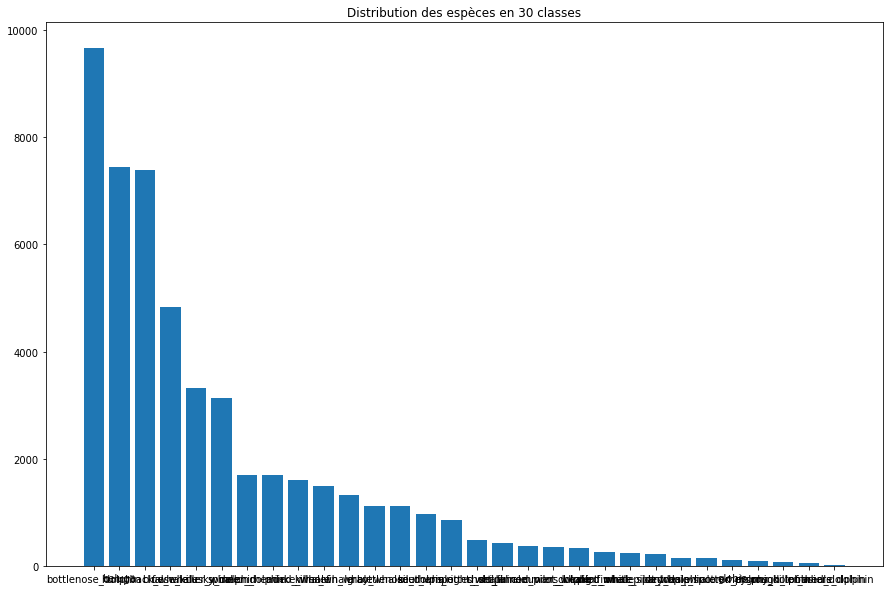

In [12]:
species_dict = dict(train_data['species'].value_counts())

plt.figure(figsize=(15,10))
plt.bar(*zip(*species_dict.items()))
plt.title('Distribution des espèces en 30 classes')
plt.show();

## Création classe moins précise

In [13]:
train_data['speciesv2'] = train_data['species']
train_data['speciesv2'].loc[train_data['speciesv2'].str.contains('dolphin')] = 'dolphin'
train_data['speciesv2'].loc[train_data['speciesv2'].str.contains('dolpin')] = 'dolphin'
train_data['speciesv2'].loc[train_data['speciesv2'].str.contains('whale')] = 'whale'
train_data = train_data[train_data['speciesv2'] != 'globis']
train_data

,image,species,individual_id,speciesv2
0,00021adfb725ed.jpg,melon_headed_whale,cadddb1636b9,whale
1,000562241d384d.jpg,humpback_whale,1a71fbb72250,whale
2,0007c33415ce37.jpg,false_killer_whale,60008f293a2b,whale
3,0007d9bca26a99.jpg,bottlenose_dolphin,4b00fe572063,dolphin
4,00087baf5cef7a.jpg,humpback_whale,8e5253662392,whale
...,...,...,...,...
51028,fff639a7a78b3f.jpg,beluga,5ac053677ed1,beluga
51029,fff8b32daff17e.jpg,cuviers_beaked_whale,1184686361b3,whale
51030,fff94675cc1aef.jpg,blue_whale,5401612696b9,whale
51031,fffbc5dd642d8c.jpg,beluga,4000b3d7c24e,beluga


In [14]:
speciesv2_dict = dict(train_data['speciesv2'].value_counts())
speciesv2_dict

{'whale': 26479, 'dolphin': 16995, 'beluga': 7443}

In [15]:
train_data['speciesv2'].nunique()

3

In [16]:
dumb_model_speciesv2 = round(train_data['speciesv2'].value_counts()[0] / len(train_data) *100,2)
dumb_model_speciesv2

52.0

In [17]:
rep_speciesv2 = [round(train_data['speciesv2'].value_counts()[x] / len(train_data) *100,2) for x in range(len(train_data['speciesv2'].value_counts()))]
print(rep_speciesv2)


[52.0, 33.38, 14.62]


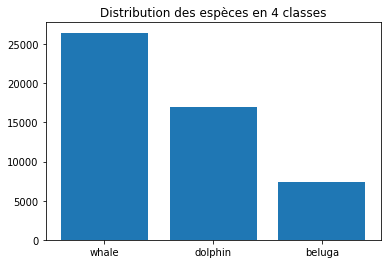

In [18]:
plt.bar(*zip(*speciesv2_dict.items()))
plt.title('Distribution des espèces en 4 classes')
plt.show();

**Nous avons toujours un problème de balancement de classe en réduisant à 4 classes. Les baleines sont sur-représentées.**

Options:<br>

    - On garde 3 classes à savoir Whale / Dolphin / Other.
    - On supprime globis (quel intérêt ?)

Il nous faudra sûrement également fabriquer de nouvelles données afin de produire plus de Other.<br>
Voir le cours de deeplearning sur la data Augmentation (lecture des CNN)

## Création de 3 classes

In [19]:
train_data['speciesv3'] = train_data['speciesv2']
train_data['speciesv3'].loc[train_data['speciesv3'].str.contains('beluga')] = 'other'
train_data['speciesv3'].loc[train_data['speciesv3'].str.contains('globis')] = 'other'
train_data

,image,species,individual_id,speciesv2,speciesv3
0,00021adfb725ed.jpg,melon_headed_whale,cadddb1636b9,whale,whale
1,000562241d384d.jpg,humpback_whale,1a71fbb72250,whale,whale
2,0007c33415ce37.jpg,false_killer_whale,60008f293a2b,whale,whale
3,0007d9bca26a99.jpg,bottlenose_dolphin,4b00fe572063,dolphin,dolphin
4,00087baf5cef7a.jpg,humpback_whale,8e5253662392,whale,whale
...,...,...,...,...,...
51028,fff639a7a78b3f.jpg,beluga,5ac053677ed1,beluga,other
51029,fff8b32daff17e.jpg,cuviers_beaked_whale,1184686361b3,whale,whale
51030,fff94675cc1aef.jpg,blue_whale,5401612696b9,whale,whale
51031,fffbc5dd642d8c.jpg,beluga,4000b3d7c24e,beluga,other


In [20]:
speciesv3_dict = dict(train_data['speciesv3'].value_counts())
speciesv3_dict

{'whale': 26479, 'dolphin': 16995, 'other': 7443}

In [21]:
train_data['speciesv3'].nunique()

3

In [22]:
dumb_model_speciesv3 = round(train_data['speciesv3'].value_counts()[0] / len(train_data) *100,2)
dumb_model_speciesv3

52.0

In [23]:
rep_speciesv3 = [round(train_data['speciesv3'].value_counts()[x] / len(train_data) *100,2) for x in range(len(train_data['speciesv3'].value_counts()))]
print(rep_speciesv3)

[52.0, 33.38, 14.62]


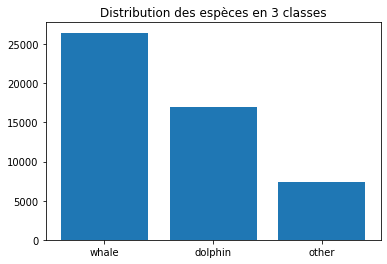

In [24]:
plt.bar(*zip(*speciesv3_dict.items()))
plt.title('Distribution des espèces en 3 classes')
plt.show();

Même problématique que pour la classification en 4 classes. Mais sûrement plus simple à gérer pour la création de data ?

## Exploration par individus

In [25]:
train_data.head(5)

,image,species,individual_id,speciesv2,speciesv3
0,00021adfb725ed.jpg,melon_headed_whale,cadddb1636b9,whale,whale
1,000562241d384d.jpg,humpback_whale,1a71fbb72250,whale,whale
2,0007c33415ce37.jpg,false_killer_whale,60008f293a2b,whale,whale
3,0007d9bca26a99.jpg,bottlenose_dolphin,4b00fe572063,dolphin,dolphin
4,00087baf5cef7a.jpg,humpback_whale,8e5253662392,whale,whale


In [26]:
train_data['individual_id'].value_counts()

37c7aba965a5    400
114207cab555    168
a6e325d8e924    155
19fbb960f07d    154
c995c043c353    153
               ... 
7da30c559ad2      1
882c59ba34bb      1
704e724a033f      1
08983c540e76      1
bc6fcab946c4      1
Name: individual_id, Length: 15539, dtype: int64

In [27]:
plt.bar(x=train_data['individual_id'].value_counts(), height=train_data['individual_id'].value_counts().keys())

<BarContainer object of 15539 artists>

Error in callback <function flush_figures at 0x7f67e8147700> (for post_execute):


KeyboardInterrupt: 

In [28]:
train_data_ind = train_data[['image', 'species', 'individual_id']].groupby(train_data['individual_id']).count()
print(train_data_ind.describe())
print(train_data_ind.head(5))

              image       species  individual_id
count  15539.000000  15539.000000   15539.000000
mean       3.276723      3.276723       3.276723
std        9.256065      9.256065       9.256065
min        1.000000      1.000000       1.000000
25%        1.000000      1.000000       1.000000
50%        1.000000      1.000000       1.000000
75%        2.000000      2.000000       2.000000
max      400.000000    400.000000     400.000000
               image  species  individual_id
individual_id                               
0013f1f5f2f0       1        1              1
001618e0a31e       1        1              1
0018a0f40586       1        1              1
00191b9a2f6f       1        1              1
001a09e48b2d       4        4              4


In [29]:
train_data_ind = train_data_ind.sort_values('image')
train_data_ind

,image,species,individual_id
individual_id,,,
0013f1f5f2f0,1,1,1
950d3419802e,1,1,1
9513dd85f0b7,1,1,1
951e34bca414,1,1,1
952eba72d865,1,1,1
...,...,...,...
c995c043c353,153,153,153
19fbb960f07d,154,154,154
a6e325d8e924,155,155,155


In [30]:
train_data_ind['image'].value_counts()

1      9241
2      3075
3       767
4       737
5       372
       ... 
89        1
93        1
61        1
98        1
400       1
Name: image, Length: 108, dtype: int64

(0.0, 3500.0)

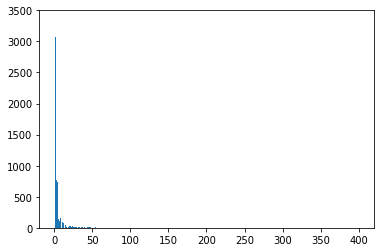

In [31]:
plt.bar(height=train_data_ind['image'].value_counts(), x=train_data_ind['image'].value_counts().keys())
plt.ylim(0,3500)

##

In [32]:
from matplotlib import image
import numpy as np
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import smart_resize
images_name = ["000bef247c7a42.jpg", "000a8f2d5c316a.jpg", "000be9acf46619.jpg"]
size = (256, 256)

2022-05-16 14:49:15.843759: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-05-16 14:49:15.843925: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [33]:
img = image.imread("Data/train_image/000a8f2d5c316a.jpg")
for image_name in images_name:
    path = f"Data/train_image/{image_name}"
    print(path)
    img = image.imread(path)
    print(img.shape)
    processed_img = preprocess_input(img, mode='tf')
    print(processed_img.shape)

FileNotFoundError: [Errno 2] No such file or directory: 'Data/train_image/000a8f2d5c316a.jpg'

In [ ]:
for image_name in images_name:
    path = f"Data/train_image/{image_name}"
    print(path)
    img = image.imread(path)
    print(img.shape)

In [ ]:
print( type(img) )
print( img.shape )

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(img, cmap='gray')

In [ ]:
# Considering only 1/10th of the 50_000 images
reduction_factor = 0.5
# Choosing the random indices of small train set and small test set
idx_train =  np.random.choice(len(images_train), round(len(images_train)/reduction_factor))
idx_test =  np.random.choice(len(images_test), round(len(images_test)/reduction_factor))
# Collecting the two subsamples images_train_small and images_test_small from images_train and images_test
images_train_small = images_train[idx_train]
images_test_small = images_test[idx_test]
# and their corresponding labels
labels_train_small = labels_train[idx_train]
labels_test_small = labels_test[idx_test]
print(“------------------ Before -----------------“)
print(images_train.shape, images_test.shape)
print(“”)
print(“--- After applying the reduction factor ---“)
print(images_train_small.shape, images_test_small.shape)
print(“”)
print(“-”*43)
unique, counts = np.unique(labels_train_small, return_counts=True)
dict(zip(unique, counts)

## Data 35000 images

In [34]:
path = '../../asoggia/tails-and-whales/raw_data/train_kaggle.csv'
train_data_35000 = pd.read_csv(path)
train_data_35000.head(5)

train_data_35000['speciesv2'] = train_data_35000['species']
train_data_35000['speciesv2'].loc[train_data_35000['speciesv2'].str.contains('dolphin')] = 'dolphin'
train_data_35000['speciesv2'].loc[train_data_35000['speciesv2'].str.contains('dolpin')] = 'dolphin'
train_data_35000['speciesv2'].loc[train_data_35000['speciesv2'].str.contains('whale')] = 'whale'
train_data_35000 = train_data_35000[train_data_35000['speciesv2'] != 'globis']

train_data_reset_index = train_data_35000.reset_index().drop(columns='index')
train_data_reset_index = train_data_reset_index[train_data_reset_index.index < 35000]
data_35000 = train_data_reset_index
data_35000

,image,species,individual_id,speciesv2
0,00021adfb725ed.jpg,melon_headed_whale,cadddb1636b9,whale
1,000562241d384d.jpg,humpback_whale,1a71fbb72250,whale
2,0007c33415ce37.jpg,false_killer_whale,60008f293a2b,whale
3,0007d9bca26a99.jpg,bottlenose_dolphin,4b00fe572063,dolphin
4,00087baf5cef7a.jpg,humpback_whale,8e5253662392,whale
...,...,...,...,...
34995,b00abc67597f5f.jpg,bottlenose_dolphin,77410a623426,dolphin
34996,b00d1d92a3acea.jpg,beluga,ab259a0d70c5,beluga
34997,b00da8fa269a88.jpg,bottlenose_dolphin,9e89f8e28807,dolphin
34998,b00dc4eb8b144e.jpg,false_killer_whale,b5e1ee74f22b,whale


In [35]:
speciesv2_dict_35000 = dict(data_35000['speciesv2'].value_counts())
speciesv2_dict_35000

{'whale': 18176, 'dolphin': 11713, 'beluga': 5111}

In [36]:
data_35000['speciesv2'].nunique()

3

In [37]:
dumb_model_speciesv2_35000 = round(data_35000['speciesv2'].value_counts()[0] / len(data_35000) *100,2)
dumb_model_speciesv2_35000

51.93

In [38]:
rep_speciesv2_35000 = [round(data_35000['speciesv2'].value_counts()[x] / len(data_35000) *100,2) for x in range(len(data_35000['speciesv2'].value_counts()))]
print(rep_speciesv2_35000)

[51.93, 33.47, 14.6]


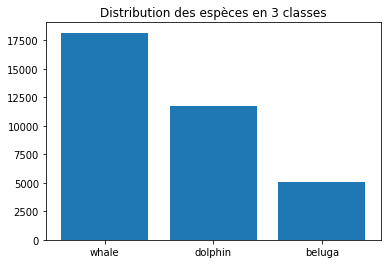

In [39]:
plt.bar(*zip(*speciesv2_dict.items()))
plt.title('Distribution des espèces en 3 classes')
plt.show();

## Data 15 000 images

In [41]:
path = '../../asoggia/tails-and-whales/raw_data/train_kaggle.csv'
train_data_15000 = pd.read_csv(path)
train_data_15000.head(5)

train_data_15000['speciesv2'] = train_data_15000['species']
train_data_15000['speciesv2'].loc[train_data_15000['speciesv2'].str.contains('dolphin')] = 'dolphin'
train_data_15000['speciesv2'].loc[train_data_15000['speciesv2'].str.contains('dolpin')] = 'dolphin'
train_data_15000['speciesv2'].loc[train_data_15000['speciesv2'].str.contains('whale')] = 'whale'
train_data_15000 = train_data_15000[train_data_15000['speciesv2'] != 'globis']

train_data_reset_index_15000 = train_data_15000.reset_index().drop(columns='index')
train_data_reset_index_15000 = train_data_reset_index_15000[train_data_reset_index_15000.index < 15000]
data_15000 = train_data_reset_index_15000
data_15000

,image,species,individual_id,speciesv2
0,00021adfb725ed.jpg,melon_headed_whale,cadddb1636b9,whale
1,000562241d384d.jpg,humpback_whale,1a71fbb72250,whale
2,0007c33415ce37.jpg,false_killer_whale,60008f293a2b,whale
3,0007d9bca26a99.jpg,bottlenose_dolphin,4b00fe572063,dolphin
4,00087baf5cef7a.jpg,humpback_whale,8e5253662392,whale
...,...,...,...,...
14995,4bde08624a15b0.jpg,humpback_whale,6a6fa3ec3810,whale
14996,4bde1a53e11cc6.jpg,blue_whale,b2e3f33766a1,whale
14997,4bdeae775e0a0c.jpg,dusky_dolphin,5384a03ce34d,dolphin
14998,4bdecf5fd5857d.jpg,humpback_whale,ca69a5d7c122,whale


In [43]:
speciesv2_dict_15000 = dict(data_15000['speciesv2'].value_counts())
speciesv2_dict_15000

{'whale': 7762, 'dolphin': 5050, 'beluga': 2188}

In [44]:
dumb_model_speciesv2_15000 = round(data_15000['speciesv2'].value_counts()[0] / len(data_15000) *100,2)
dumb_model_speciesv2_15000

51.75

In [45]:
rep_speciesv2_15000 = [round(data_15000['speciesv2'].value_counts()[x] / len(data_15000) *100,2) for x in range(len(data_15000['speciesv2'].value_counts()))]
print(rep_speciesv2_15000)

[51.75, 33.67, 14.59]


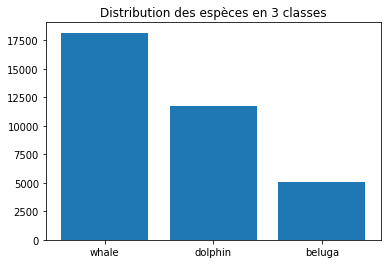

In [46]:
plt.bar(*zip(*speciesv2_dict.items()))
plt.title('Distribution des espèces en 3 classes')
plt.show();